# Import packages to parse results

In [11]:
from glob import glob
from tabulate import tabulate
from IPython.display import HTML
import pandas as pd
import json

import plotly.graph_objects as go
import scipy.stats as stats
import os
import import_ipynb
from shared_notebook import create_dataframe

### Set default color palete and size for making plots

In [12]:
%store -r colorPallet
%store -r bgColor
%store -r baseFigureWidth
%store -r baseFigureHeight

## Log file locations relative to notebook

### For BWA, we have 3 different clusters, 1 method with two different payloads, multiple concurrent calls

In [13]:
# kOps clusters (running on AWS)
# AWS EKS cluster
clusters={
    'kOps 8x 8vCPU 16Gb arm64': 'kops-multi-tenant-spot-8x-8vcpu-16gb-arm64',
    'EKS 8x 8vCPU 16Gb arm64': 'eks-multi-tenant-spot-8x-8vcpu-16gb-arm64'
}
methods=('normal', 'tumor')
headers=list(methods)
headers.insert(0, 'concurrent calls')
concurrent_calls=(2, 3, 4, 5)

bwa_df=dict()
for k, v in clusters.items():
    bwa_df[k]=dict()
    for m in methods:
        bwa_df[k][m]=dict()
        for c in concurrent_calls:
            bwa_df[k][m][c]=create_dataframe(f"../logs/openfaas/{v}/bwa/concurrent/{c}/*{m}*")

# Using tabulate to create tables for results

In [14]:
# Mean runtime
table=dict()
runtime_data=dict()
for k in clusters:
    runtime_data[k]=[]
    for count, value in enumerate(concurrent_calls):
        runtime_data[k].append([value])
        for m in methods:
            mean_runtime=bwa_df[k][m][value]['runtime'].mean()
            runtime_data[k][count].append(mean_runtime)
    table[k] = tabulate(runtime_data[k], tablefmt='html', headers=headers)
    display(HTML(f'<h3>Mean runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,normal,tumor
2,93575.1,102260
3,86740.5,97575.2
4,96482.7,112466
5,102486,118493


concurrent calls,normal,tumor
2,103307,116660
3,89253.3,107167
4,107338,124364
5,106908,119610


# Scatter plot of runtimes

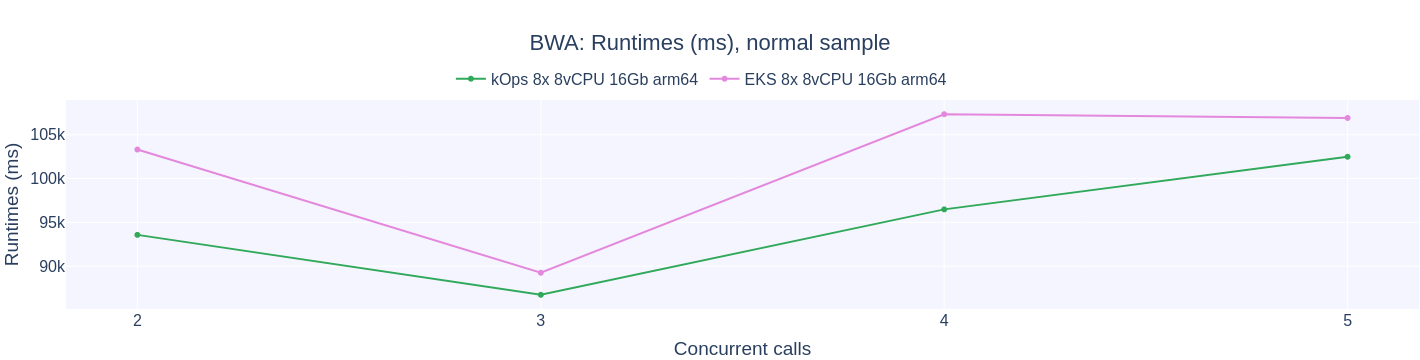

In [15]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title=dict(
        text="BWA: Runtimes (ms), normal sample",
        x=0.5,
        xanchor='center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters, 3):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [bwa_df[k]['normal'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

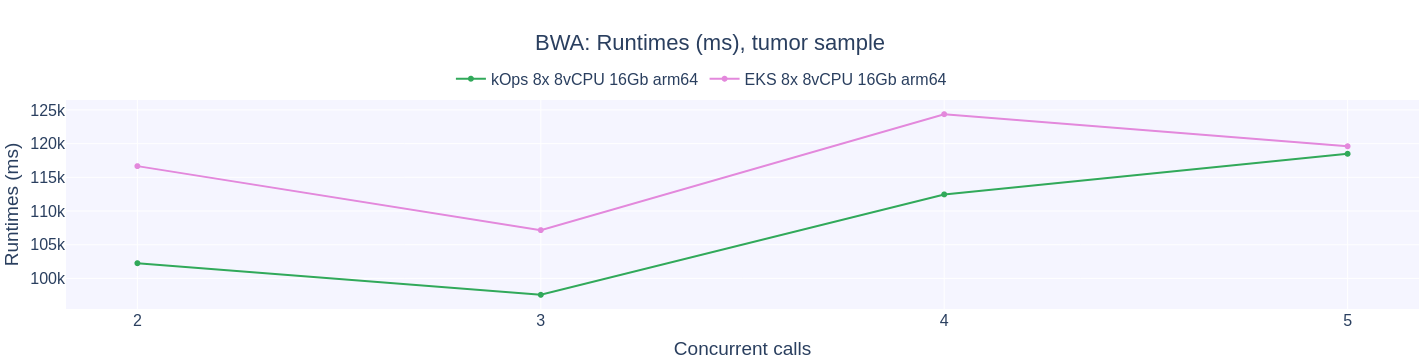

In [30]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title=dict(
        text="BWA: Runtimes (ms), tumor sample",
        x=0.5,
        xanchor='center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters, 3):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [bwa_df[k]['tumor'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

In [17]:
# Standard runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            std_runtime=bwa_df[k][m][value]['runtime'].std()
            data[count].append(std_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Std runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,normal,tumor
2,13998,10965.2
3,10206.8,10247.6
4,19202.6,26677.8
5,20361.8,26113.2


concurrent calls,normal,tumor
2,21921.4,31056
3,17879.6,24992
4,33391.1,31338.6
5,24285.2,30663.8


In [18]:
# CV runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=bwa_df[k][m][value]['runtime'].mean()
            std_runtime=bwa_df[k][m][value]['runtime'].std()
            cv_runtime=std_runtime/mean_runtime
            data[count].append(cv_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>CV runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,normal,tumor
2,0.149591,0.107228
3,0.117671,0.105023
4,0.199026,0.237207
5,0.198678,0.220378


concurrent calls,normal,tumor
2,0.212197,0.266209
3,0.200324,0.233205
4,0.311085,0.251991
5,0.227158,0.256365


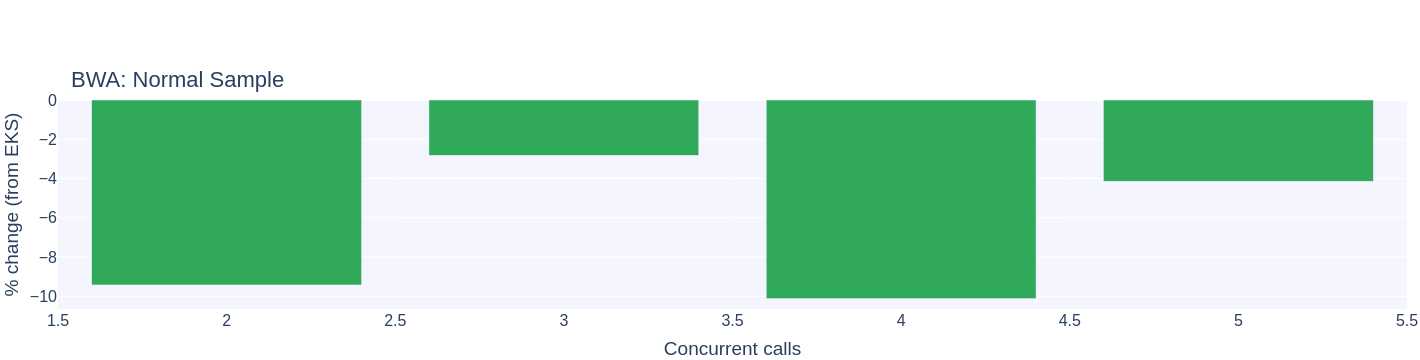

In [27]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title=dict(
        text="BWA: Normal Sample",
        y=0.8
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=3):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=bwa_df[k]['normal'][c]['runtime'].mean()
        eks_mean=bwa_df['EKS 8x 8vCPU 16Gb arm64']['normal'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/bwa_arm64_normal_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [20]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb arm64</b> independent t-test (normal sample)</h3>'))
    for i in range(2,6):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(bwa_df[k]['normal'][i]['runtime'], bwa_df['EKS 8x 8vCPU 16Gb arm64']['normal'][i]['runtime']))

2 concurrent calls
Ttest_indResult(statistic=-1.6733370072379463, pvalue=0.10247494510497084)
3 concurrent calls
Ttest_indResult(statistic=-0.6685015236275451, pvalue=0.5064654366412303)
4 concurrent calls
Ttest_indResult(statistic=-1.7588258064730768, pvalue=0.08274109992163317)
5 concurrent calls
Ttest_indResult(statistic=-0.9739490344697183, pvalue=0.3325552969278822)


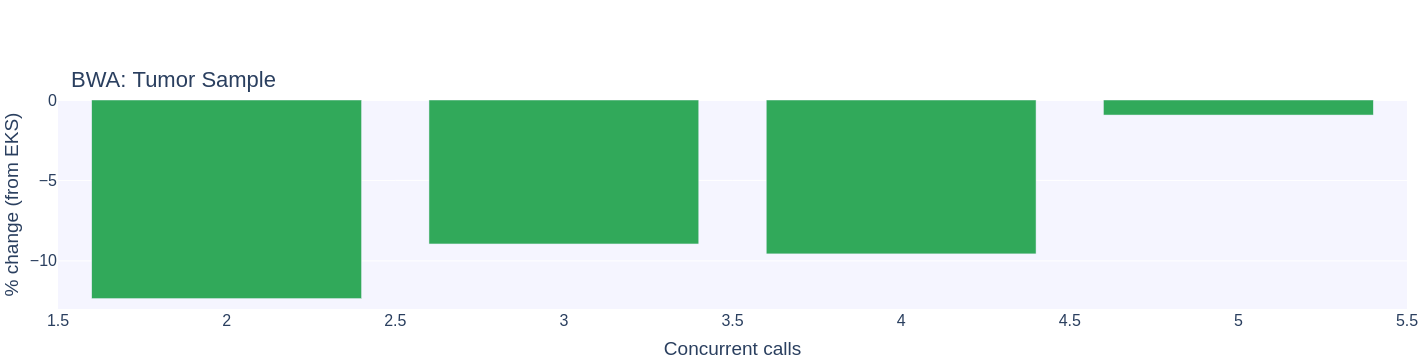

In [28]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=0,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title={
        'text': "BWA: Tumor Sample",
        'y':0.8,
        'yanchor': 'top'},
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=3):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=bwa_df[k]['tumor'][c]['runtime'].mean()
        eks_mean=bwa_df['EKS 8x 8vCPU 16Gb arm64']['tumor'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/bwa_arm64_tumor_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [22]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb arm64</b> independent t-test (tumor sample)</h3>'))
    for i in range(2,6):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(bwa_df[k]['tumor'][i]['runtime'], bwa_df['EKS 8x 8vCPU 16Gb arm64']['tumor'][i]['runtime']))

2 concurrent calls
Ttest_indResult(statistic=-1.9553511746830987, pvalue=0.057925069960697566)
3 concurrent calls
Ttest_indResult(statistic=-1.9450643695767817, pvalue=0.05662043287024605)
4 concurrent calls
Ttest_indResult(statistic=-1.7853164227845746, pvalue=0.07830762075344)
5 concurrent calls
Ttest_indResult(statistic=-0.19330418248373898, pvalue=0.8471334384363466)
